In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
from matplotlib.colors import LinearSegmentedColormap


#plot parameters
font_size=10
plt.style.use('seaborn-paper')
plt.rc('text', usetex=True)
plt.rc('font',family='serif',serif='Computer Modern')
plt.rc('xtick', labelsize=font_size)
plt.rc('ytick', labelsize=font_size)
plt.rc('axes', labelsize=font_size)
plt.rc('legend', fontsize=font_size-1)

#color list
color_list = ["#c7e9b4","#7fcdbb","#41b6c4","#1d91c0","#225ea8", "#0c2c84"]
newcm = LinearSegmentedColormap.from_list('ColorMap',color_list)
color_list2 = ["#2b83ba","#fdae61","#83b692","#d36060","#8E7891"] #["#2b83ba","#d7191c","#fdae61"]

/var/folders/9v/j2dwy_kx7c32vpw655tnps0r0000gp/T/ipykernel_45025/1149202359.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-paper')


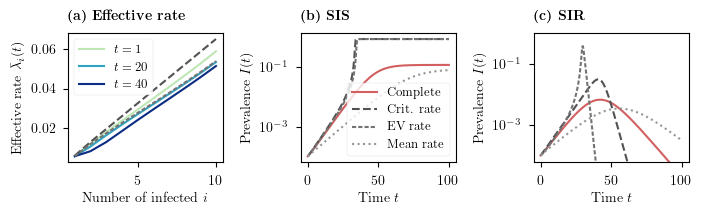

In [2]:
#plot

width = 7.057
height = width/3.5
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(width,height))
plt.subplots_adjust(left=0.1, bottom=0.23, right=0.98,
                    top=0.87, wspace=0.5, hspace=0.6)
#data import
exp = 'exp1'


#==============
#rate evolution
#==============
for model in ['SIR']:
    res_file = f'./time-evo-{model}/dat/res_{exp}.pk'
    res = pickle.load(open(res_file,"rb"))
    t = res['t']

    # t_list = [1,10,20,60]
    t_list = [1,20,40]
    nmax = 10
    eff_rate_list = res['eff_rate_list']
    crit_rate = res['crit_eff_rate'][nmax]
    ev_rate = res['ev_eff_rate'][nmax]
    for j in range(1,len(t)):
        if t[j] in t_list:
            lw = 1.5
            alpha = 1
            label = fr'$t = {int(t[j])}$'
        else:
            lw = 0.8
            alpha = 0.
            label=None
        eff_rate = eff_rate_list[j][nmax]
        color_x = t[j]/t_list[-1]
        axes[0].plot(np.arange(1,nmax+1),eff_rate[1:],
                     color=newcm(color_x),
                     label=label, lw=lw, alpha=alpha)

    axes[0].legend(frameon=True, loc='upper left')
    lw = 1.5
    axes[0].plot(np.arange(1,nmax+1),crit_rate[1:], '--', color='#525252', lw = lw,
                    label='Crit. rate')
    axes[0].plot(np.arange(1,nmax+1),ev_rate[1:], ls=(0, (2, 1)), color='#737373', lw = lw,
                alpha=1, label='EV rate')
    # axes[0].set_yscale('log')

axes[0].set_xlabel(r'Number of infected $i$')
axes[0].set_ylabel(r'Effective rate $\bar{\lambda}_i(t)$')

axes[0].text(0, 1.1, r'\textbf{(a) Effective rate}', fontsize=font_size,
            transform=axes[0].transAxes)

#========
#SIS
#========
res_file = f'./time-evo-SIS/dat/res_{exp}.pk'
res = pickle.load(open(res_file,"rb"))
t = res['t']

#prevalence evolution
lw = 1.5
I_mean = res['I_mean']
I_comp = res['I_comp']
I_crit = res['I_crit']
I_ev = res['I_ev']
indmax = 220
axes[1].plot(t[:indmax],I_comp[:indmax],
             label='Complete', color=color_list2[3], lw=lw)
axes[1].plot(t[:indmax],I_crit[:indmax], '--', label='Crit. rate',
             color='#525252', lw=lw)
axes[1].plot(t[:indmax],I_ev[:indmax], ls=(0, (2, 1)), label='EV rate',
             color='#737373', lw=lw)
axes[1].plot(t[:indmax],I_mean[:indmax], ':', label='Mean rate',
             color='#969696', lw=lw)
axes[1].set_yscale('log')
# axes[1].set_ylim([10**(-6),3])
axes[1].set_xlabel(r'Time $t$')
axes[1].set_ylabel(r'Prevalence $I(t)$')
axes[1].legend(frameon=True, loc='best')
axes[1].text(0, 1.1, r'\textbf{(b) SIS}', fontsize=font_size,
            transform=axes[1].transAxes)

#==========
#SIR
#==========
res_file = f'./time-evo-SIR/dat/res_{exp}.pk'
res = pickle.load(open(res_file,"rb"))
t = res['t']

#prevalence evolution
lw = 1.5
I_mean = res['I_mean']
I_comp = res['I_comp']
I_crit = res['I_crit']
I_ev = res['I_ev']

indmax = 250
axes[2].plot(t[:indmax],I_comp[:indmax],
             label='Complete', color=color_list2[3], lw=lw)
axes[2].plot(t[:indmax],I_crit[:indmax], '--', label='Crit. rate',
             color='#525252', lw=lw)
axes[2].plot(t[:indmax],I_ev[:indmax], ls=(0, (2, 1)), label='EV rate',
             color='#737373', lw=lw)
axes[2].plot(t[:indmax],I_mean[:indmax],':', label='Mean rate',
             color='#969696', lw=lw)
axes[2].set_yscale('log')
axes[2].set_xlabel(r'Time $t$')
axes[2].set_ylabel(r'Prevalence $I(t)$')

axes[2].set_ylim([6*10**(-5),1])

axes[2].text(0, 1.1, r'\textbf{(c) SIR}', fontsize=font_size,
            transform=axes[2].transAxes)

plt.show()
